<a href="https://colab.research.google.com/github/sheethal3838/imad-app/blob/master/customer_lifetime_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('customer_acquisition_data.csv')
print (data.head(5))

   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419


In [9]:
# prompt: count of customer_id

customer_id_count = data['customer_id'].count()
print(f"Number of customer_id: {customer_id_count}")


Number of customer_id: 800


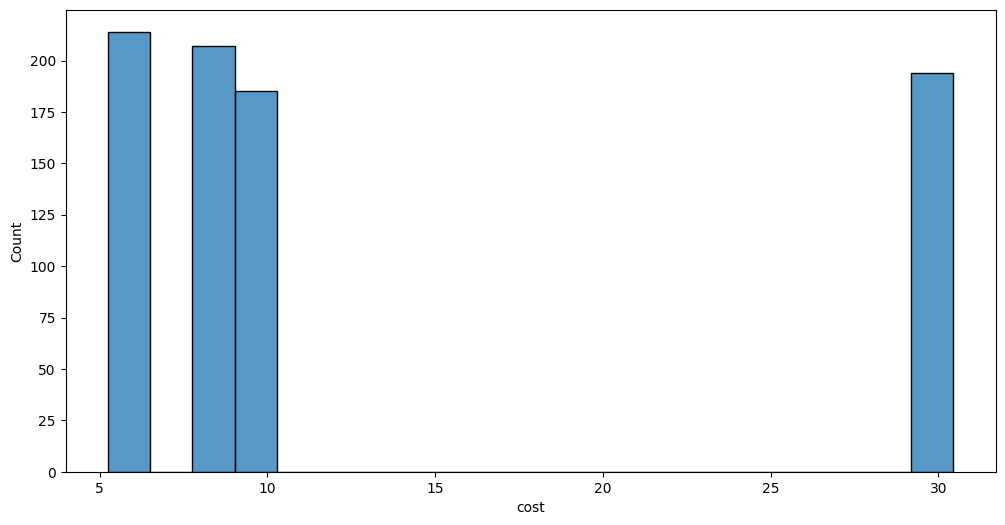

In [12]:
# prompt: Create a hist plot with cost in X axis and number of customer is Y axis. nbins = 20. The graph should be 12,6

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='cost', bins=20)
plt.show()


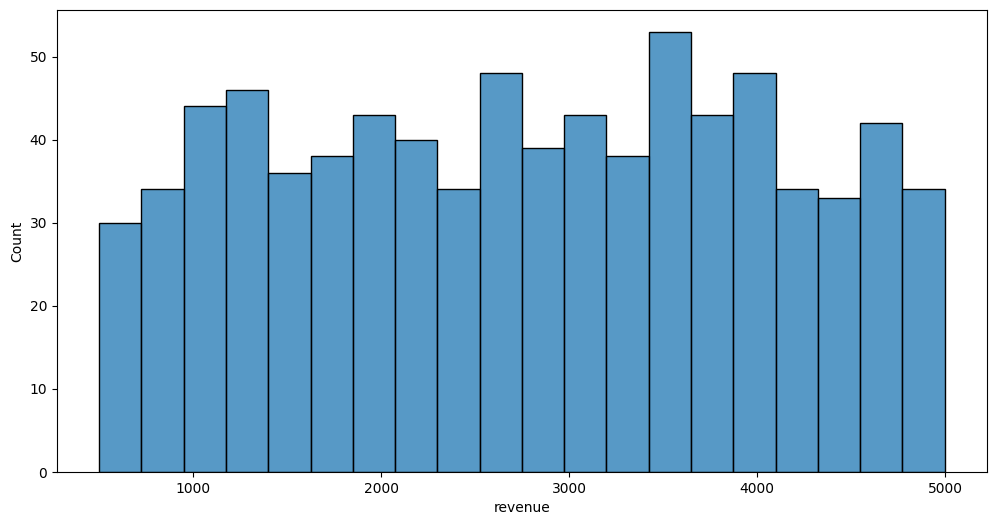

In [13]:
# prompt: Create a hist plot with revenue in x axis and number of customers in Y axis. size should be 12,6

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='revenue', bins=20)
plt.show()


In [14]:
# prompt: print the channel. Do not repeat values

print(data['channel'].unique())


['referral' 'paid advertising' 'email marketing' 'social media']


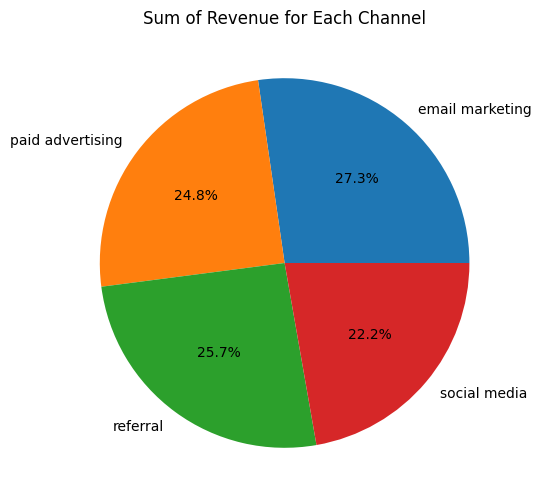

In [23]:
# prompt: Give me the sum of revenue for each channel. and create a pie chart

import matplotlib.pyplot as plt
channel_revenue = data.groupby('channel')['revenue'].sum()

plt.figure(figsize=(12, 6))
plt.pie(channel_revenue, labels=channel_revenue.index, autopct="%1.1f%%")
plt.title('Sum of Revenue for Each Channel')
plt.show()


In [28]:
# prompt: Give me the sum of cost for each channel

channel_cost = data.groupby('channel')['cost'].sum()

print(f"Sum of cost for each channel: {channel_cost}")


Sum of cost for each channel: channel
email marketing     1122.700340
paid advertising    5907.363479
referral            1722.307634
social media        1766.070249
Name: cost, dtype: float64


In [20]:
# prompt: Divide channel_revenue with channel_cost

channel_roi = channel_revenue / channel_cost
print(channel_roi)


channel
email marketing     538.617455
paid advertising     92.832615
referral            330.691213
social media        278.962290
dtype: float64


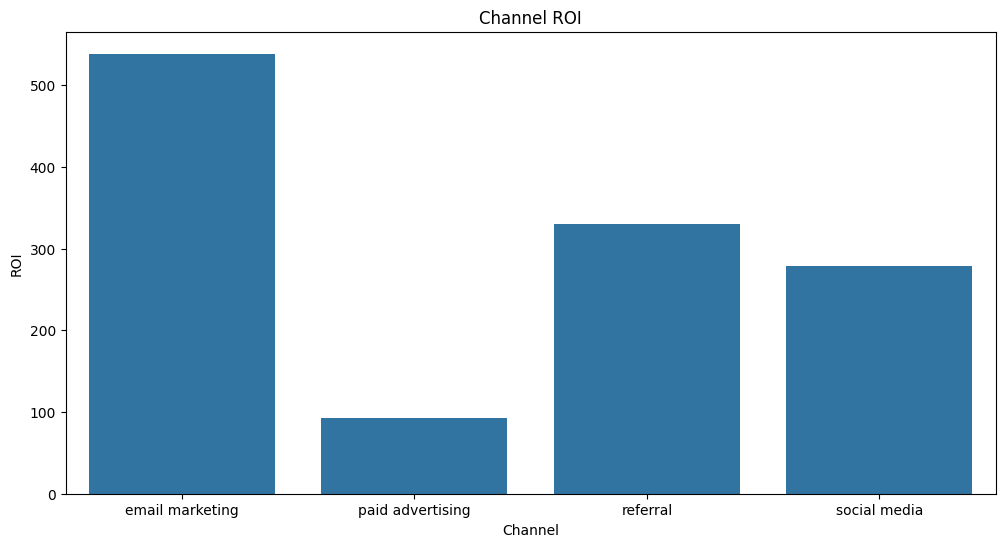

In [22]:
# prompt: create a bar chart for channel_roi

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x=channel_roi.index, y=channel_roi.values)
plt.xlabel('Channel')
plt.ylabel('ROI')
plt.title('Channel ROI')
plt.show()


In [27]:
# prompt: Give me the sum of conversion_rate for each channel

channel_conversion_rate = data.groupby('channel')['conversion_rate'].sum()
print(channel_conversion_rate)


channel
email marketing      9.377957
paid advertising     3.170249
referral            25.491011
social media        31.004566
Name: conversion_rate, dtype: float64


In [32]:
# prompt: Calculate customer lifetime value for each channel

channel_clv = (channel_revenue - channel_cost) * (channel_conversion_rate/channel_cost)
print(channel_clv)


channel
email marketing     5041.753333
paid advertising     291.132290
referral            8404.162196
social media        8618.100085
dtype: float64


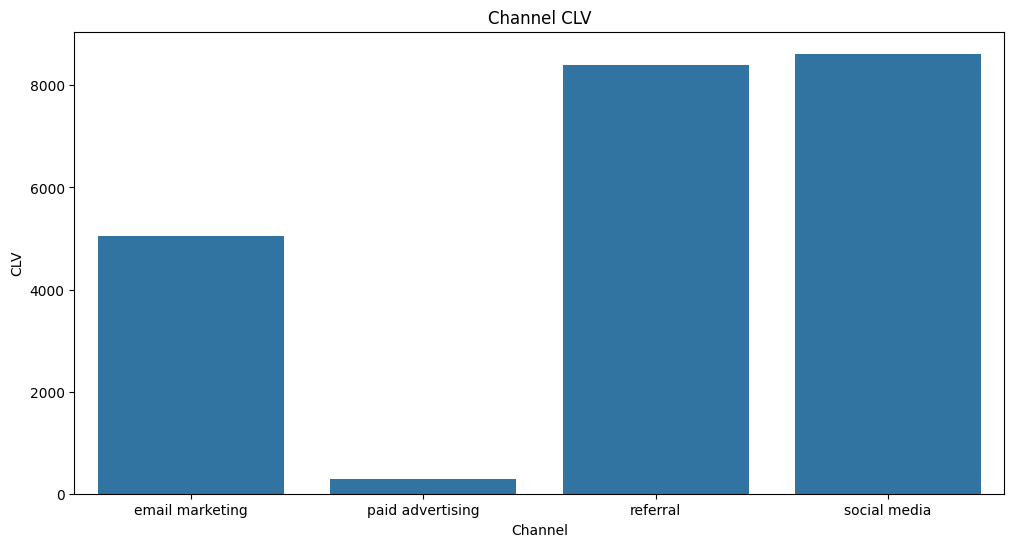

In [37]:
# prompt: create a bar chart with channel_clv in x axis and values in Y axis

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x=channel_clv.index, y=channel_clv.values)
plt.xlabel('Channel')
plt.ylabel('CLV')
plt.title('Channel CLV')
plt.show()
